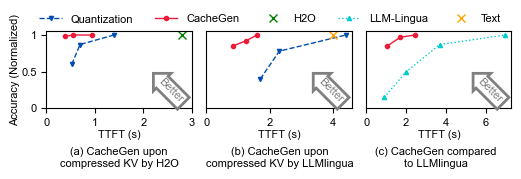

In [70]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

from mpl_toolkits.axisartist.axislines import SubplotZero
import json
from io import StringIO
import pandas as pd

fontsize = 8
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = fontsize
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.linewidth']=1
plt.rcParams['lines.markersize']=3

CYAN_LINE = "#00cccc"
CYAN = "cyan"
ORANGE_LINE = "#F2AA3C"
ORANGE = "orange"
GREEN = "#0BEF48"
BLUE = "blue"
PURPLE = "#B682F8"
colors = [
    '#004DAF',
    '#ED1B3A',
    '#FF9900',
    '#33A02C',
    '#FABEAF',
    '#AAD59B',
    '#FC5A50',
    "#008080",
    "#0000FF",
    "#808000",
    "#800080"
]
SYS_COLOR = colors[1]
WORSE_BASELINE_COLOR = colors[0]
BETTER_BASELINE_COLOR = colors[0]

# def plot(csv, ax, title, xlabel, type,
#                       need_y_label=False, need_legend=-1):

#     data = json.load(open(csv))
#     lines = []
#     lines.append())
#     lines.append()


#     ax.set_xlim(left=0)
#     # ax.set_title(title, fontsize=fontsize)
#     ax.set_ylim(bottom=0, top=1.05)
#     ax.set_yticks([])
#     ax.set_ylabel("")
#     if need_y_label:
#         ax.set_ylabel("Accuracy (Normalized)",
#                       fontsize=fontsize, labelpad=1)
#         ax.set_yticks([0, 0.5, 1], [0, 0.5, 1], fontsize=fontsize)
#     if need_legend >= 0:
#         ax.legend(loc="upper right", frameon=False,
#                     bbox_to_anchor=[2.7, 1.3], ncol=3)
#     t = ax.text(0.1, 0.1, title, c='black', transform=ax.transAxes, fontsize=fontsize + 1, weight="bold")
#     ax.set_xlabel(xlabel, labelpad=1)

fig, axes = plt.subplots(1, 3, figsize=(6, 1))
plt.subplots_adjust(wspace=0.1, hspace=0.4)


cur_type = "ttft"
xlabel = "TTFT (s)"
ax = axes[0]
csv = 'cachegen_apply_h2o.json' 
data = json.load(open(csv))
ax.plot(data[f'quant_ttft'], data['quant_quality'], c=BETTER_BASELINE_COLOR, marker="v",  label="Quantization", ls="--")
ax.plot(data[f'cachegen_ttft'], data[f'cachegen_quality'], marker="o", c=SYS_COLOR, label="CacheGen")
ax.plot(data[f'h2o_ttft'], data[f'h2o_quality'], marker="x", c="green", label="H2O", markersize=6, ls=" ")
ax.set_xlim(left=0, right=3)
# ax.set_title(title, fontsize=fontsize)
ax.set_ylim(bottom=0, top=1.05)
ax.set_ylabel("Accuracy (Normalized)",
                      fontsize=fontsize, labelpad=1)
ax.set_yticks([0, 0.5, 1], [0, 0.5, 1], fontsize=fontsize)
ax.set_xlabel(xlabel, labelpad=1)

handles, labels = ax.get_legend_handles_labels()
llm_lingua_line = mlines.Line2D([], [], color='#00cccc', label='LLM-Lingua', ls=":", marker="^")
handles.append(llm_lingua_line)
labels.append("LLM-Lingua")

text_line = mlines.Line2D([], [], color='orange', markersize=6, label='Text', ls=" ", marker="x")
handles.append(text_line)
labels.append("Text")


ax.legend(handles, labels, loc="upper right", frameon=False,
                    bbox_to_anchor=[3.2, 1.35], ncol=5)
ax.text(1.5, -0.8, "(a) CacheGen upon\ncompressed KV by H2O", ha="center")


cur_type = "ttft"
xlabel = "TTFT (s)"
ax = axes[2]
csv = 'llm_lingua.json' 
data = json.load(open(csv))
ax.plot(data[f'quant_ttft'], data['quant_quality'], c='#00cccc', marker="^",  label="Quantization", ls=":")
ax.plot(data[f'cachegen_ttft'], data[f'cachegen_quality'], marker="o", c=SYS_COLOR, label="CacheGen")
ax.set_xlim(left=0)
# ax.set_title(title, fontsize=fontsize)
ax.set_ylim(bottom=0, top=1.05)
ax.set_ylabel("")
ax.set_yticks([])
ax.set_xlabel(xlabel, labelpad=1)
ax.text(3.5, -0.8, "(c) CacheGen compared\nto LLMlingua", ha="center")

cur_type = "ttft"
xlabel = "TTFT (s)"
ax = axes[1]
csv = 'longchat_30B.json' 
data = json.load(open(csv))
ax.plot(data[f'quant_ttft'], data['quant_quality'], c=BETTER_BASELINE_COLOR, marker="v",  label="Quantization", ls="--")
ax.plot(data[f'cachegen_ttft'], data[f'cachegen_quality'], marker="o", c=SYS_COLOR, label="CacheGen")
ax.plot(data[f'text_ttft'], data[f'text_quality'], marker="x", markersize=6, c="orange", label="Text")
ax.set_xlim(left=0)
ax.set_ylim(bottom=0, top=1.05)
ax.set_ylabel("")
ax.set_yticks([])
ax.set_xlabel(xlabel, labelpad=1)
ax.text(2.3, -0.8, "(b) CacheGen upon\ncompressed KV by LLMlingua", ha="center")

for ax in axes:
	bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
	t = ax.text(0.95, 0.05, "Better", ha="right", 
				va="bottom", rotation=-45, bbox=bbox_props, c='grey',
				transform=ax.transAxes)
fig.savefig("fig-h2o.pdf", bbox_inches="tight", transparent=True)